# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

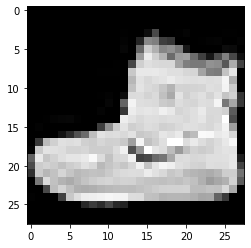

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [10]:
### Tu código para la red neuronal de la pregunta 1 aquí ###

from tensorflow import keras

# Creamos un modelo conformado por una secuencia de capas
model = keras.models.Sequential()
# Capa 1
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa 2
model.add(keras.layers.Dense(128, activation="sigmoid"))
# Capa 3: Con 10 neuronas, las 10 posibles prendas
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

X_valid, X_train = training_images[:5000], training_images[5000:]
y_valid, y_train = training_labels[:5000], training_labels[5000:]

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=64)

Epoch 1/20
860/860 [==============================] - 4s 4ms/step - loss: 0.1734 - accuracy: 0.9375 - val_loss: 0.2890 - val_accuracy: 0.8952
Epoch 2/20
860/860 [==============================] - 3s 4ms/step - loss: 0.1694 - accuracy: 0.9387 - val_loss: 0.2862 - val_accuracy: 0.8988
Epoch 3/20
860/860 [==============================] - 3s 3ms/step - loss: 0.1654 - accuracy: 0.9405 - val_loss: 0.2936 - val_accuracy: 0.8940
Epoch 4/20
860/860 [==============================] - 3s 3ms/step - loss: 0.1617 - accuracy: 0.9416 - val_loss: 0.2961 - val_accuracy: 0.8970
Epoch 5/20
860/860 [==============================] - 3s 3ms/step - loss: 0.1580 - accuracy: 0.9440 - val_loss: 0.2974 - val_accuracy: 0.8988
Epoch 6/20
860/860 [==============================] - 3s 3ms/step - loss: 0.1548 - accuracy: 0.9445 - val_loss: 0.2908 - val_accuracy: 0.8978
Epoch 7/20
860/860 [==============================] - 3s 3ms/step - loss: 0.1500 - accuracy: 0.9466 - val_loss: 0.2965 - val_accuracy: 0.8980
Epoch 

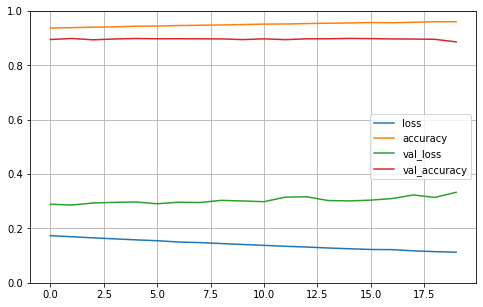

In [14]:
import pandas as pd 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [17]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###

model.evaluate(test_images, test_labels) 

313/313 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8773


[0.37855109572410583, 0.8773000240325928]

Podemos ver que en la última iteración del entrenamiendo del modelo tenemos:

1.   loss: 0.1126
2.   accuracy: 0.9605

Tras evaluar el modelo con los valores de test podemos considerar que está bien entrenado ya que tenemos unos valores semejantes:

1.   loss: 0.3786
2.   accuracy: 0.8773

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [37]:
### Tu código del clasificador de la pregunta 3 aquí ###

classifications = model.predict(test_images)
print(classifications[0])
print(np.argmax(classifications[0]))

[7.8277669e-11 3.8395145e-10 1.6089382e-09 3.1912883e-10 4.3480936e-10 6.2448089e-06 1.3633886e-08 9.2139933e-04 1.1584957e-11 9.9907231e-01]
9


Tu respuesta a la pregunta 3.1 aquí:

Representa el nivel de **confianza** del modelo sobre las imagenes de prendas de ropa.

Tu respuesta a la pregunta 3.2 aquí:

Clase

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [30]:
### Tu código para 512 neuronas aquí ###
# Creamos un modelo conformado por una secuencia de capas
model_512 = keras.models.Sequential()
# Capa 1
model_512.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa 2
model_512.add(keras.layers.Dense(512, activation="sigmoid"))
# Capa 3: Con 10 neuronas, las 10 posibles prendas
model_512.add(keras.layers.Dense(10, activation="softmax"))
model_512.summary()

# Compilamos el modelo
model_512.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Entrenamos el modelo
history = model_512.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=64)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
860/860 [==============================] - 6s 6ms/step - loss: 0.5366 - accuracy: 0.8108 - val_loss: 0.4325 - val_accuracy: 0.8454
Epoch 2/20
860/860 [==============================] - 5s 6ms/step - loss: 0.4072 - accuracy: 0.8538 - val_loss: 0.3868 - val_accuracy: 0.8606
Epoch 3/20
860/860 [==============================] - 5s 6ms/step - loss: 0.3673 - accuracy: 

In [31]:
### Tu código para 1024 neuronas aquí ###
# Creamos un modelo conformado por una secuencia de capas
model_1024 = keras.models.Sequential()
# Capa 1
model_1024.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa 2
model_1024.add(keras.layers.Dense(1024, activation="sigmoid"))
# Capa 3: Con 10 neuronas, las 10 posibles prendas
model_1024.add(keras.layers.Dense(10, activation="softmax"))
model_1024.summary()

# Compilamos el modelo
model_1024.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Entrenamos el modelo
history = model_1024.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=64)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
860/860 [==============================] - 9s 10ms/step - loss: 0.5304 - accuracy: 0.8115 - val_loss: 0.4134 - val_accuracy: 0.8596
Epoch 2/20
860/860 [==============================] - 8s 10ms/step - loss: 0.4079 - accuracy: 0.8529 - val_loss: 0.3724 - val_accuracy: 0.8644
Epoch 3/20
860/860 [==============================] - 8s 10ms/step - loss: 0.3696 - accurac

Tu respuesta a la pregunta 4.3 aquí:


Como podemos ver en los valores de la última iteración del entrenamiento del modelo, estos devuelven resultados muy parecidos incluso aumentando neuronas.

*   128 Neuronas: loss: 0.1126 - accuracy: 0.9605 - val_loss: 0.3330 - val_accuracy: 0.8864
*   512 Neuronas: loss: 0.1695 - accuracy: 0.9382 - val_loss: 0.3088 - val_accuracy: 0.8896
*   1024 Neuronas: loss: 0.1553 - accuracy: 0.9413 - val_loss: 0.3117 - val_accuracy: 0.8948

Al parece son capaces de predecir casi con la misma precisión, la gran diferencia entre ellos está en los parámetros donde:

*   128 Neuronas: 101 parámetros
*   512 Neuronas: 407 parámetros
*   1024 Neuronas: 814 parámetros

Con lo que en conclusión no necesitamos más neuronas para mejorar la predicción, solo conseguimos necesitar más tiempo para entrenar el modelo.



Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [36]:
### Tu código del clasificador de la pregunta 5 aquí ###

classifications = model_512.predict(test_images)
print(classifications[0])
print(np.argmax(classifications[0]))

classifications = model_1024.predict(test_images)
print(classifications[0])
print(np.argmax(classifications[0]))


[8.9554391e-09 1.4146716e-09 7.7721953e-09 7.8955792e-10 1.9942927e-08 9.4262501e-03 2.0829210e-08 1.2611136e-03 3.2429643e-08 9.8931259e-01]
9
[1.2702189e-09 2.2472886e-10 5.5661575e-10 2.1863412e-11 5.5513460e-10 6.5829357e-05 3.3182459e-09 1.7740599e-04 3.1353153e-11 9.9975675e-01]
9


Tu respuesta a la pregunta 5.1 aquí:

En ambos predictores clasifica con la clase 9

Tu respuesta a la pregunta 5.2 aquí:

Creo que predice con la misma clase ya que los valores de loss y accuracy son casi identicos en los 3 modelos con diferentes neuronas.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [41]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
# Creamos un modelo conformado por una secuencia de capas
model = keras.models.Sequential()

# Capa 1
model.add(keras.layers.Dense(128, activation="sigmoid"))
# Capa 2: Con 10 neuronas, las 10 posibles prendas
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

ValueError: ignored

Tu respuesta a la pregunta 6 aquí:

Por que estamos usando redes neuronales clásicas y estas necesitan recibir los valores de forma escalar, osea pixel a pixel (1 dimensión).

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [55]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

# Creamos un modelo conformado por una secuencia de capas
model = keras.models.Sequential()
# Capa 1
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa 2
model.add(keras.layers.Dense(128, activation="sigmoid"))
# Capa 3: Con 5 neuronas, las 10 posibles prendas
model.add(keras.layers.Dense(5, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=64)


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 645       
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


InvalidArgumentError: ignored

Tu respuestas a la pregunta 7.1 aquí:

Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

Tu respuestas a la pregunta 7.2 aquí:

Al entrenar el modelo nos lanza un error indicando que:

Recibió un valor de etiqueta de 9 que está fuera del rango válido de [0, 5).

Con lo cual no podemos predecir con 5 neuronas de salida.

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [50]:
### Tu código para 15 epoch aquí ###

# Creamos un modelo conformado por una secuencia de capas
model = keras.models.Sequential()
# Capa 1
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa 2
model.add(keras.layers.Dense(128, activation="sigmoid"))
# Capa 3: Con 10 neuronas, las 10 posibles prendas
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), batch_size=64)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
860/860 [==============================] - 3s 3ms/step - loss: 0.6158 - accuracy: 0.7941 - val_loss: 0.4397 - val_accuracy: 0.8486
Epoch 2/15
860/860 [==============================] - 3s 3ms/step - loss: 0.4201 - accuracy: 0.8499 - val_loss: 0.3997 - val_accuracy: 0.8558
Epoch 3/15
860/860 [==============================] - 3s 3ms/step - loss: 0.3801 - accuracy: 

In [56]:
### Tu código para 30 epoch aquí ###

# Creamos un modelo conformado por una secuencia de capas
model = keras.models.Sequential()
# Capa 1
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Capa 2
model.add(keras.layers.Dense(128, activation="sigmoid"))
# Capa 3: Con 10 neuronas, las 10 posibles prendas
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=64)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f3d1bd72440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


860/860 [==============================] - 113s 3ms/step - loss: 0.6089 - accuracy: 0.7977 - val_loss: 0.4396 - val_accuracy: 0.8462
Epoch 2/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4191 - accuracy: 0.8507 - val_loss: 0.3877 - val_accuracy: 0.8632
Epoch 3/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3799 - accuracy: 0.8623 - val_loss: 0.3650 - val_accuracy: 0.8690
Epoch 4/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3545 - accuracy: 0.8724 - val_loss: 0.3508 - val_accuracy: 0.8722
Epoch 5/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3360 - accuracy: 0.8787 - val_loss: 0.3396 - val_accuracy: 0.8744
Epoch 6/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3195 - accuracy: 0.8844 - val_loss: 0.3309 - val_accuracy: 0.8778
Epoch 7/30
860/860 [==============================] - 3s 3ms/step - loss: 0.3069 - accuracy: 0.8886 - val_loss: 0.3322 - val_accuracy: 0.8774
Epoch 8/30
860/

Tu respuesta a la pregunta 8.3 aquí:

En ciertos pasos el algoritmo se aleja de la función verdadera, aumentando de manera previsible el error de predicción sobre los datos de validación

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [57]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [59]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')> 0.40):
              print("\nAlcanzado el 40% de loss, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.6.0
Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4742 - accuracy: 0.8301

Alcanzado el 40% de loss, se cancela el entrenamiento!!
